#__Lab-5 Assignment__ Multivariate Regression, Non-Parametric Models and Cross-Validation

# __Lakshay_SONI__ 8888349

In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate







In [2]:
#diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y=True,as_frame=True)
diabetes_X['target'] = diabetes_Y  # Add the 'target' column
diabetes_X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [9]:
diabetes_Y.head()


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [11]:
diabetes_X.shape , diabetes_Y.shape

((442, 11), (442,))

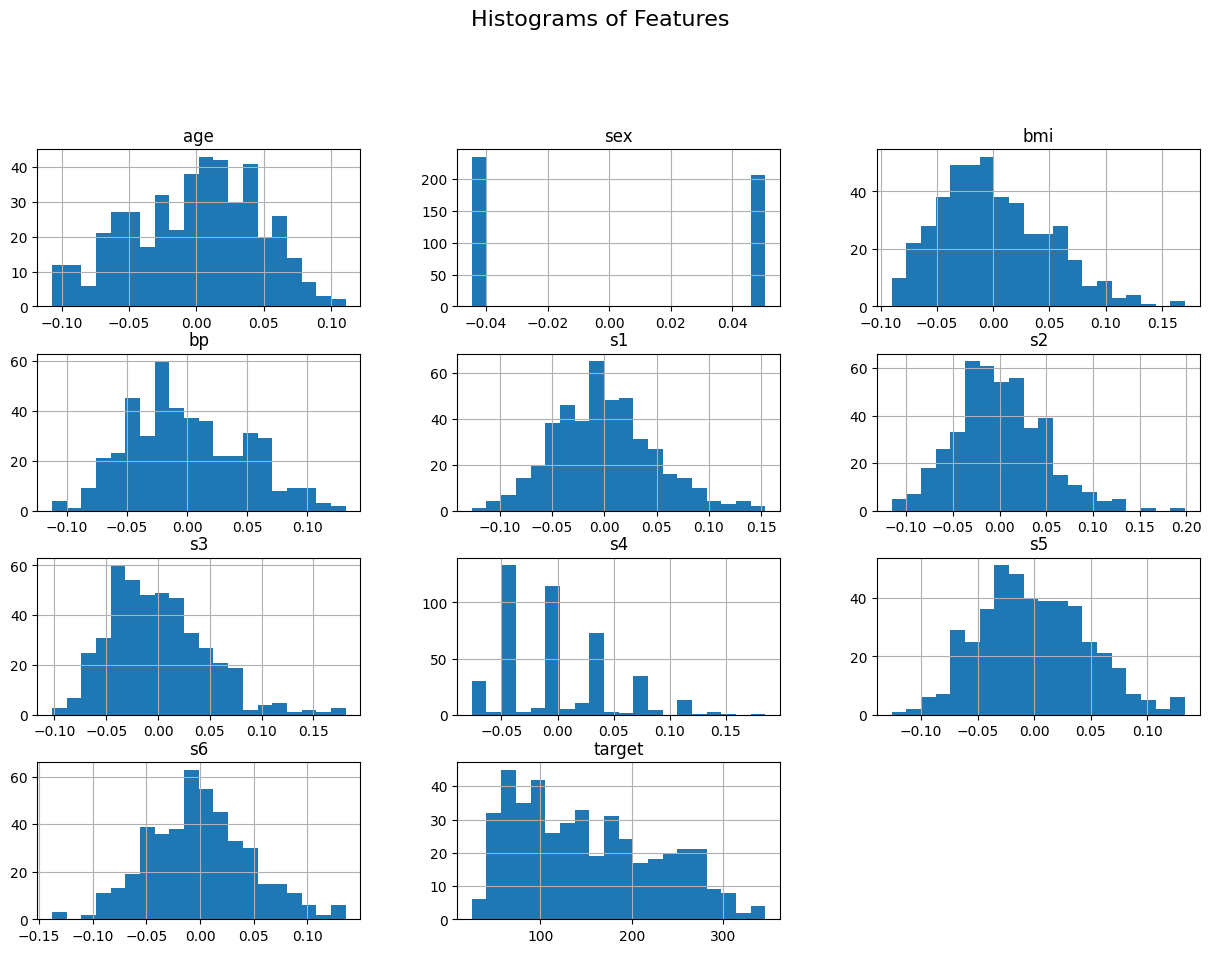

In [7]:
# Plotting histograms
# labelling it for better understanding
#features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
#labels = ['Age', 'Sex', 'BMI', 'Blood Pressure', 'Total Serum Cholesterol', 
 #         'LDL', 'HDL', 'Total Cholesterol/HDL', 'Serum Triglycerides', 'Blood Sugar Level']

diabetes_X.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

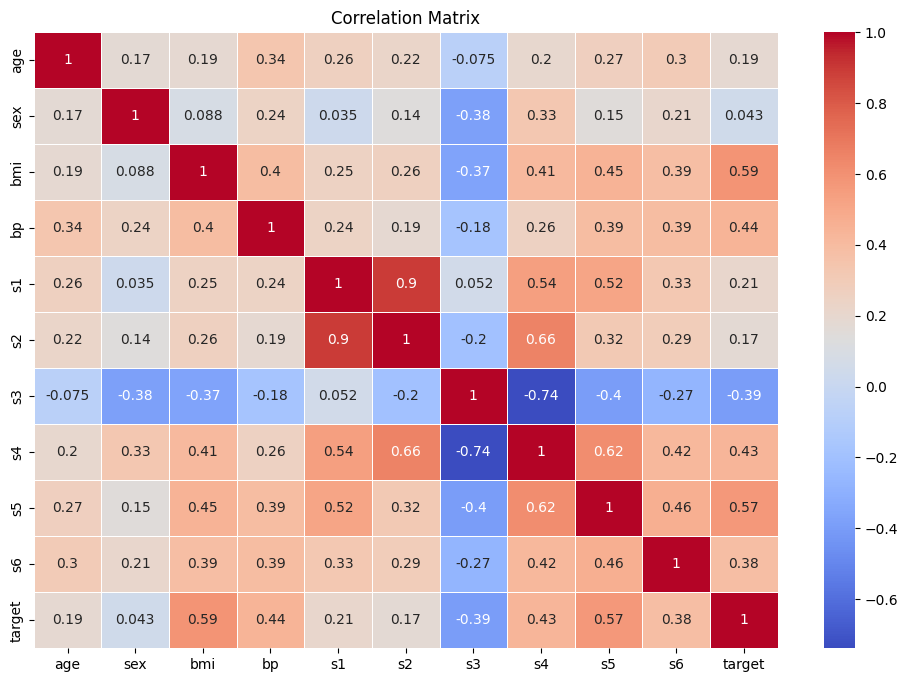

In [13]:
# Plot a correlation matrix
correlation_matrix = diabetes_X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


By looking out at the above correlation s1and s2 are highly cor-related comapring to others.
S4 as well as S3 is showing negative highly correlation.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X_LS = diabetes_X.drop('target', axis=1)
y_LS = diabetes_Y  # Since 'diabetes_y' is already the target variable
diabetes_X.head()
# Split the data into train, validation, and test sets
train_X_LS, test_X_LS, train_y_LS, test_y_LS = train_test_split(X_LS, y_LS, test_size=0.3, random_state=42)


After completing exploratory data analysis (EDA), we evaluate whether to fix missing values,standardise features through scaling, and partition the dataset into training and testing subsets based on our findings.

### **Modeling the Data:**

# Polynomail Regression #


In [16]:
degrees = [3,4]
ploynomial_models = []

for i in degrees:
    modelp = make_pipeline(PolynomialFeatures(i),LinearRegression())
    modelp.fit(train_X_LS, train_y_LS)
    ploynomial_models.append(modelp)

# Decision Trees #

In [17]:
from sklearn.tree import DecisionTreeRegressor
depth_tree = [4, 5]
decision_tree_models = []

for j in depth_tree:
    modeldt = DecisionTreeRegressor(max_depth=j)
    modeldt.fit(train_X_LS, train_y_LS)
    decision_tree_models.append(modeldt)

# Knn #

In [18]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [7,9]
knn_models = []

for k in k_values:
    modelknn = KNeighborsRegressor(n_neighbors=k)
    modelknn.fit(train_X_LS, train_y_LS)
    knn_models.append(modelknn)

Printing the results

In [19]:
print(ploynomial_models)
print(decision_tree_models)
print(knn_models)

[Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())]), Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])]
[DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=5)]
[KNeighborsRegressor(n_neighbors=7), KNeighborsRegressor(n_neighbors=9)]


Cross Validation

In [20]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

# cross-validation for polynomial models
poly_cv_results = []
for i in ploynomial_models:
    cv_scores = cross_validate(i, train_X_LS, train_y_LS, scoring=scoring, cv=5)
    poly_cv_results.append(cv_scores)

# cross-validation for decision tree models
dt_cv_results = []
for j in decision_tree_models:
    cv_scores = cross_validate(j, train_X_LS, train_y_LS, scoring=scoring, cv=5)
    dt_cv_results.append(cv_scores)

# cross-validation for kNN models
knn_cv_results = []
for k in knn_models:
    cv_scores = cross_validate(k, train_X_LS, train_y_LS, scoring=scoring, cv=5)
    knn_cv_results.append(cv_scores)

In [21]:
print(poly_cv_results, "\n")
print(dt_cv_results, "\n")
print(knn_cv_results)

[{'fit_time': array([0.18781185, 0.21120501, 0.17540622, 0.32563806, 0.08088088]), 'score_time': array([0.01312709, 0.00931692, 0.0065639 , 0.01599097, 0.00567293]), 'test_r2': array([ -273.82033956, -1205.64687283,  -303.25653369,  -294.43981193,
        -466.34011295]), 'test_neg_mean_absolute_error': array([ -990.14816478, -1189.9283396 ,  -789.18879083,  -837.4350372 ,
        -904.44636916]), 'test_neg_mean_absolute_percentage_error': array([ -6.89368359, -10.62721859,  -6.07055272,  -6.79294687,
        -8.19623106])}, {'fit_time': array([0.06741667, 1.41920304, 0.75984097, 0.26779389, 0.05914497]), 'score_time': array([0.01042104, 0.00577497, 0.00651383, 0.00619602, 0.00586796]), 'test_r2': array([-24.69374218, -92.01178418, -26.76407354, -35.84549235,
       -47.58158106]), 'test_neg_mean_absolute_error': array([-301.7934438 , -380.0207706 , -232.53019912, -268.41466133,
       -295.03366983]), 'test_neg_mean_absolute_percentage_error': array([-2.05957805, -3.36837511, -1.84182

In [22]:
# constructing tables

cv_poly_df = pd.DataFrame(poly_cv_results)
cv_dt_df = pd.DataFrame(dt_cv_results)
cv_knn_df = pd.DataFrame(knn_cv_results)
print(cv_poly_df.head())


                                            fit_time  \
0  [0.18781185150146484, 0.21120500564575195, 0.1...   
1  [0.06741666793823242, 1.4192030429840088, 0.75...   

                                          score_time  \
0  [0.01312708854675293, 0.00931692123413086, 0.0...   
1  [0.010421037673950195, 0.005774974822998047, 0...   

                                             test_r2  \
0  [-273.8203395615898, -1205.6468728348004, -303...   
1  [-24.693742177149492, -92.01178418483737, -26....   

                        test_neg_mean_absolute_error  \
0  [-990.1481647780629, -1189.9283396048486, -789...   
1  [-301.79344379613616, -380.0207706003745, -232...   

             test_neg_mean_absolute_percentage_error  
0  [-6.893683585787903, -10.62721858924597, -6.07...  
1  [-2.059578046190179, -3.3683751133388733, -1.8...  


When fitting the data, scores are computed more slowly than by Model 1 and Model 2. Additionally, when comparing the outcomes of different tests, Model 1 typically has fewer errors than Model 2. In summary, Model 2 outperforms Model 1 in every area we measured.

Graphical predictions from Model 1 may be less precise and more dispersed than those from Model 2 due to their longer fit and scoring times, lower R2 scores, and more significant negative MAE and MAPE values.

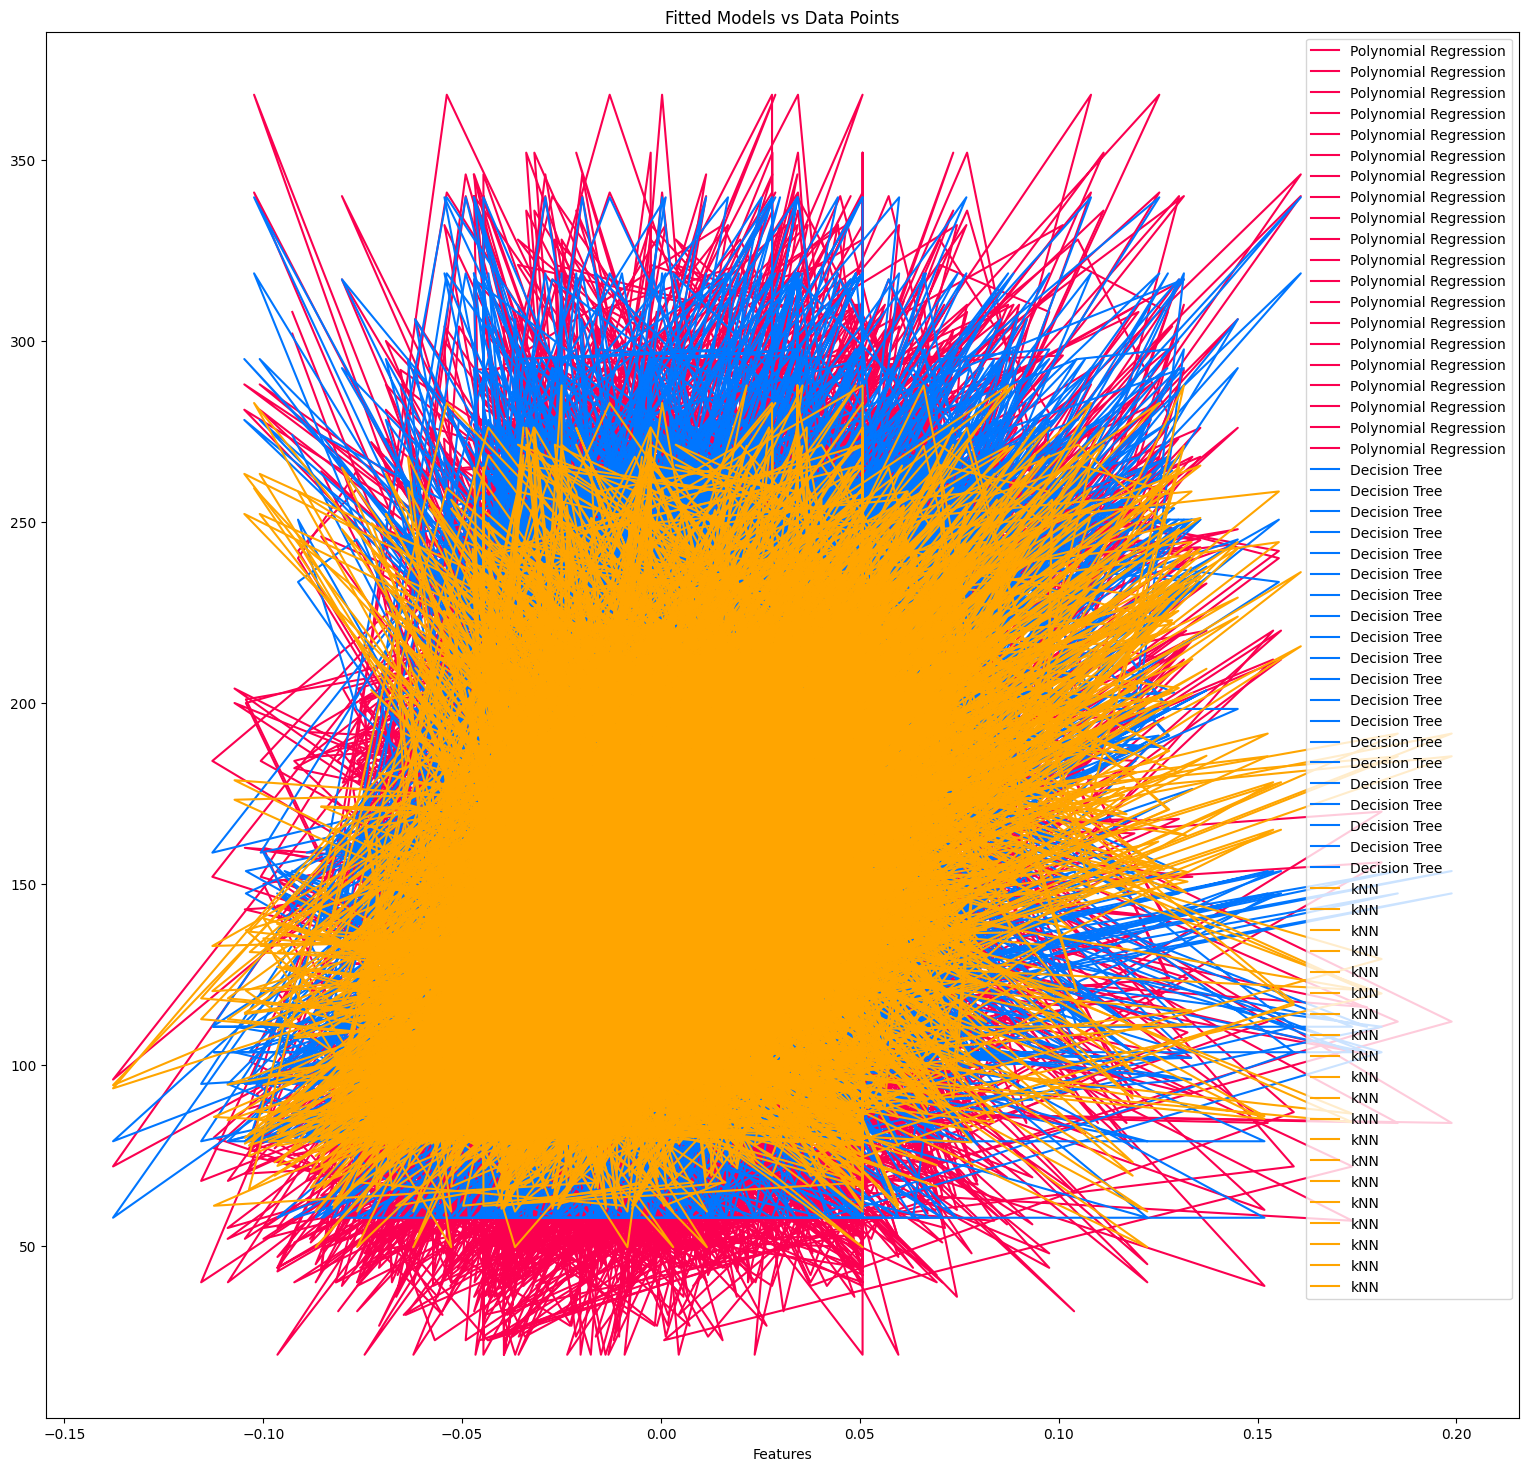

In [23]:
plt.figure(figsize=(19,18))



for i in ploynomial_models:
    plt.plot(train_X_LS, i.predict(train_X_LS), label='Polynomial Regression', color='#FB0050')

# Plot decision tree models
for j in decision_tree_models:
    plt.plot(train_X_LS, j.predict(train_X_LS), label='Decision Tree', color='#0076FF')

# Plot kNN models
for k in knn_models:
    plt.plot(train_X_LS, k.predict(train_X_LS), label='kNN', color='#FFA500')

plt.xlabel('Features')
plt.ylabel('')
plt.title('Fitted Models vs Data Points')
plt.legend()
plt.show()


Each model is represented by a different colour in the visualization, which uses a 2-degree representation to depict the predictions for the training and testing sets. Because it performs consistently on training and testing data, KNN stands out as the most dependable model.